# Bayesian methods for machine learning - Week 1

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from graphviz import Digraph

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

## Bayesian & statistics review

### Discrete variables

Discrete variables are conviniently defined by their **Probability Mass Function (PMF)**. Given a variable $X$ that can take 4 values, a PMF $P(X)$ example can be:

$$
p(X) =
\begin{cases}
0.10 & X = 1 \\
0.25 & X = 2 \\
0.20 & X = 3 \\
0.45 & X = 4 \\
0 & otherwise
\end{cases}
$$

Note that, given $k$ as the set of values $X$ can take:

$$
\sum_i k_i = 1
$$

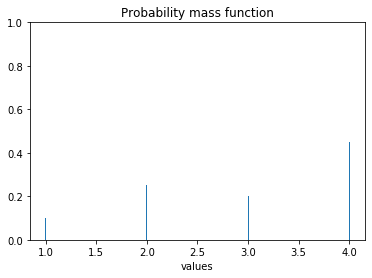

In [4]:
plt.bar([1, 2, 3, 4], [0.10, 0.25, 0.20, 0.45], width=0.01)
ax = plt.gca()
ax.set_xlabel("values")
ax.set_title('Probability mass function')
ax.set_ylim([0, 1]);
plt.show()

### Continuous variables

Continuous variables are conviniently defined by their **Probability Density Function (PDF)**, which assigns a non-negative value for each point of the continuous domain.

For instance, given a variable $X \sim N(\mu, \sigma)$, its probability density function is defined as:

$$
P(X) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{1}{2}\left(\frac{x - \mu}{\sigma}\right)^2}
$$

For $\mu=0$, $\sigma=1$, we would have:

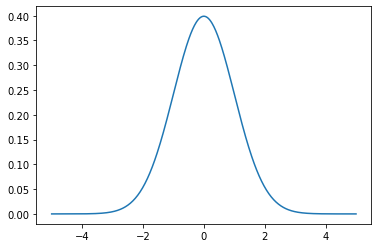

In [5]:
mean, sigma = 0, 1
x = np.linspace(-5, 5, 500)
y = [norm.pdf(i, loc=mean, scale=sigma) for i in x]
plt.plot(x, y)

Note that the probability of variable $X$ falling in range $x \in [a, b]$ is computed as:

$$
P(x \in[a, b]) = \int^b_a P(X) dx
$$

Which is equivalent to computing the area of the curve between $a$ and $b$.

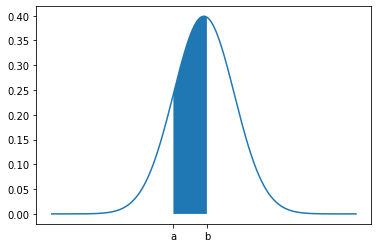

In [6]:
a, b = -1, 0.1
plt.plot(x, y)
section = np.linspace(a, b, 1000)
plt.fill_between(
    section,
    [norm.pdf(i, loc=mean, scale=sigma) for i in section]
)
plt.xticks([a, b], labels=["a", "b"]);

For instance, given $a = -1$ and $b = 0.1$, there are many ways we can compute density in interval.

In [7]:
p_a_b = norm.cdf(b, loc=mean, scale=sigma) - norm.cdf(a, loc=mean, scale=sigma)
print(f'Probability of X being in interval [{a}, {b}] is: {p_a_b}')

Probability of X being in interval [-1, 0.1] is: 0.3811725833455719


We can replicate this by summing over the area of muñltiple tiny rectangles under the curve by discretizing the interval between $a$ and $b$:

In [8]:
n = 20000
step_size = abs(a - b) / n
p_a_b_estimate = np.sum(
    [norm.pdf(i, loc=mean, scale=sigma) * step_size
     for i in np.linspace(a, b, n)]
)
print(f'Probability of X being in interval [{a}, {b}] is: {p_a_b_estimate}')

Probability of X being in interval [-1, 0.1] is: 0.3811710950353777


### Indepencence

Two random variables are independent if the joint probability equals to the product of their marginals:

$$
P(X, Y) = P(X) P(Y)
$$

On the other hand, we define conditional probability of $X$ given $Y$ happened as the joint probability of both variables divided by the marginal of $Y$:

$$
P(X|Y) = \frac{P(X, Y)}{P(Y)}
$$

### Chain rule

Then, we can derive the **chain rule**:

$$
P(X, Y) = P(X|Y) P(Y)
$$

The general formula for the chain rule given $N$ random variables $\{X_1, \ldots, X_N\}$ is:

$$
P(X_1, \ldots, X_N) = \prod^N_{i=1} P(X_i|X_1, \ldots, X_{i-1})
$$

### Marginalization

Given we have the joint probability $P(X, Y)$, we can derive the marginal $P(X)$ by integrating over all values of $Y$:

$$
P(X=x) = \int^{\infty}_{-\infty} P(X=x,Y) dY
$$

Which, in the discrete case, is:

$$
P(X=x) = \sum_{k} P(X=x, Y=k)
$$

Where $K$ are all possible values $Y$ can take.

### Bayes rules

Before diving into it, let's define review:

- **Posterior probability** $P(\theta|X)$ is the probability of the parameters of a model after observing the data.
- **Likelihood** $P(X|\theta)$ is the probability of the data given the model parameters and represents how well the parameters explain our data.
- **Prior** is the prior knowledge we have about the model parameters.

We can derive Bayes rule from the definition of conditional probablity, an we can expand it using the chain rule:

$$
P(\theta|X) = \frac{P(X, \theta)}{P(X)} = \frac{P(X|\theta)P(\theta)}{P(X)}
$$

$P(X)$ here is called the **evidence**.

## Frequentist vs Bayesian statistics

Given $\theta$ are the model parameters and $X$ is the data:

|                           |Frequentist                  |Bayesian                   |
|---------------------------|-----------------------------|---------------------------|
| $X$ interpretation        |Random                       |Fixed                      |
| $\theta$ interpretation   |Fixed                        |Random                     |
| Data                      |Works if data >> parameters  |Works for any size of data |
| Training principle        |Maximum likelihood           |Maximum a posteriori       |

While frequentists train their models using the maximum likelihood principle:

$$
\hat{\theta} = arg max_{\theta} P(X|\theta)
$$

That is, finding the parameters that maximize the likelihood of the data.

Bayesians, however, will tend to compute the posterior for training, using the Bayes formula.

## On-line learning

Prior can be used as a regularizer and can be updated during on-line learning: posterior at time $t$ becomes prior at time $t+1$.

## Bayesian networks

A model can be easily represented as a Bayesian Network, where:
    
    - Nodes are random variables
    - Edges define dependencies between variables

As an example, let's define a Graph with nodes 'Is sunny' and 'Is warm'. Edges indicate there's indicate a relation between the random variables. So, we assume that the fact that "it is sunny" affects whether the weather "is warm". We may also consider the season of the year and add it into the network.

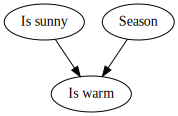

In [9]:
ex1 = Digraph()
ex1.node('A', 'Is sunny')
ex1.node('B', 'Is warm')
ex1.node('C', 'Season')
ex1.edges(['AB', 'CB'])
ex1

The joint probability over all variables is defined as:

$$
P(X_1, \ldots, X_n) = \prod^N_{i=1} P(X_i | Pa(X_i))
$$

Where $Pa$ is a function that returns the parents of a node in the graph. Note that, when a variable does not have parents, it contributes to the joint probability distribution by $P(X_i)$.

Given an arbitrary graph:

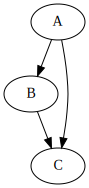

In [10]:
ex2 = Digraph()
ex2.node('A')
ex2.node('B')
ex2.node('C')
ex2.edges(['AB', 'BC', 'AC'])
ex2

We can compute its joint probability as:

$$
P(A, B, C) = P(C|B,A) P(B|A) P(A)
$$

### Naïve Bayes classifier

In Naïve Bayes classifier, all features are assumed to be independent from one another and depend only on the class:

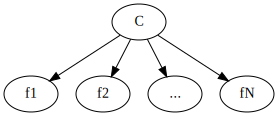

In [43]:
nb = Digraph()
nb.node('C')
nb.node('1', 'f1')
nb.node('2', 'f2')
nb.node('3', '...')
nb.node('4', 'fN')
nb.edges(['C1', 'C2', 'C3', 'C4'])
nb

Then, its joint probability is:

$$
P(C, f_1, \ldots, f_N) = P(C) \prod^N_{i=1} P(f_i | C)
$$

To simplify it, we can write the graph in plate notation, which shows that the subgraph $C \rightarrow f_i$ is to be repeated $N$ times.

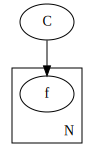

In [44]:
## Documentation:
##     - https://graphviz.readthedocs.io/en/stable/examples.html
##     - https://www.graphviz.org/doc/info/attrs.html#d:labeljust

plate_nb = Digraph()
plate_nb.node('C')

with plate_nb.subgraph(name='cluster') as plate:
    plate.node('f')
    plate.attr(label='N', labeljust='r', labelloc='b')

plate_nb.edge('C', 'f')
plate_nb